### Business Problem

Here we are intending to analyze the customer purchase behavious against gender and various other factors to help the business make better decisions.
Business wants to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

In [193]:
#Importing the libraries required

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [194]:
#Loading the dataset fromt he csv file shared

data = pd.read_csv('walmart_data.csv')
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [195]:
#We see that the dataframe is loaded and the first 5 rows of data are displayed here using the head() method
#Getting some insights on the data loaded

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


From the above output we see that 
* There are a total of 550068 rows and there are no null values in the dataset.
* There are total of 10 different columns.
* Also, the data types of the columns are correct


In [196]:
data.isnull().all()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category              False
Purchase                      False
dtype: bool

We can see that there are no null values in the dataset sample

In [197]:
#Changing the datatype of Occupation, Martial Status and Product Category to object as these are categorical variables

data[["Occupation","Marital_Status","Product_Category"]] = data[["Occupation","Marital_Status","Product_Category"]].astype("object")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 42.0+ MB


In [198]:
#Further describing the dataset, we can check if there are any outliers.
desc_info = data.describe()
desc_info

,User_ID,Purchase
count,5.500680e+05,550068.000000
mean,1.003029e+06,9263.968713
std,1.727592e+03,5023.065394
min,1.000001e+06,12.000000
25%,1.001516e+06,5823.000000
50%,1.003077e+06,8047.000000
75%,1.004478e+06,12054.000000
max,1.006040e+06,23961.000000


In the baove output only the purchase column is of our interese as the other columns, though integer type they are encoded (Categorically).
Hence looking at the Purchase column only we can infer that,

* Average Purchase Value of all the customers in the sample shared is 9263.96 dollars
* Minimum Purchase Value is 12.00 dollars, while
* Maximum Purchase Value is 23961.00 dollars.

In [199]:
#Looking at the categorical variables in our dataset
desc_obj = data.describe(include=object)
desc_obj

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068
unique,3631,2,7,21,3,5,2,20
top,P00265242,M,26-35,4,B,1,0,5
freq,1880,414259,219587,72308,231173,193821,324731,150933


From the above output we can infer that,
* There are 3631 different products that are purchased by different customers, and the top selling product is P00265242
* There are 7 different age bins in which the customres are grouped, where most of the orders are placed by the customers in the age group of 26-35 years
* The dataset contains customer details from 3 different cities where most of the orders have come from city B
* There are 21 different categories or occupations to which the customers belong

In [200]:
#Now getting an overview of the male and female customers ordered on Walmart

# male_female_split = round((100*data["Gender"].value_counts()/len(data)),2)
male_female_split = data["Gender"].value_counts()
male_female_split

M    414259
F    135809
Name: Gender, dtype: int64

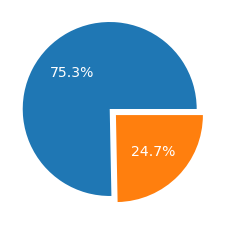

In [201]:
plt.pie(x=male_female_split,explode=[0.1,0.0],labels=male_female_split.index,autopct='%1.1f%%',textprops={'color':"w",'fontsize': 14})
plt.show()

We can see that,
* 75.31% of the orders in the sample dataset shared are placed by Males
* 24.69% of the orders in the sample dataset shared are placed by Females

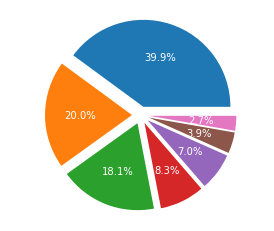

In [202]:
age_disb = data["Age"].value_counts()
plt.pie(x=age_disb,labels=age_disb.index,autopct='%1.1f%%',textprops={'color':"w",'fontsize': 10},explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1])
plt.show()

We can see from the piechart above that most of the orders 39.9% is placed by custoimers aged between 26 and 35 years followed by 36-45 years and 18-25 years with 20% and 18.1% respectively.

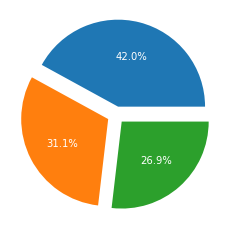

In [203]:
#Similarly analysing for the other ategorical variables to understand the distribution / share in the orders placed.
city_disb = data["City_Category"].value_counts()
plt.pie(x=city_disb,labels=city_disb.index,autopct='%1.1f%%',textprops={'color':"w",'fontsize': 10},explode = [0.1,0.1,0.1])
plt.show()

From the above chart we can see that most of the orders come from City B followed by City C and City A with a share of 42%, 31.1% and 26.9% respectively.

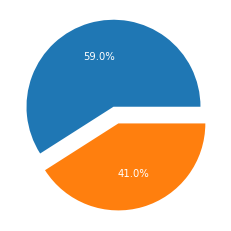

In [204]:
martial_status_disb = data["Marital_Status"].value_counts()
plt.pie(x=martial_status_disb,labels=martial_status_disb.index,autopct='%1.1f%%',textprops={'color':"w",'fontsize': 10},explode = [0.1,0.1])
plt.show()

From the above plot we can see that 59% of the orders are placed by single customers and 41% are place by married customers

## Univariate Analysis

### Further performing the univariate analysis on different categorical variables
- Product_ID
- Gender
- Age
- Occupation
- City_Category
- Stay_In_Current_City_Years
- Marital_Status
- Product_Category

<AxesSubplot:xlabel='Gender', ylabel='count'>

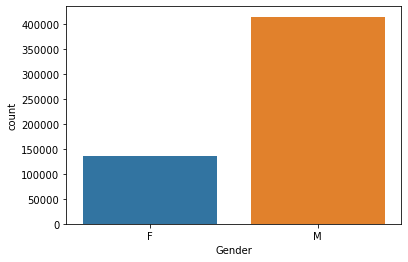

In [205]:
df = data
sns.countplot(data=df, x='Gender')

<AxesSubplot:xlabel='Age', ylabel='count'>

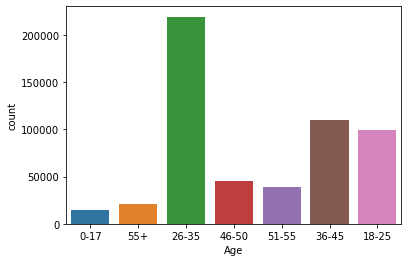

In [206]:
sns.countplot(data=df, x='Age')

<AxesSubplot:xlabel='Occupation', ylabel='count'>

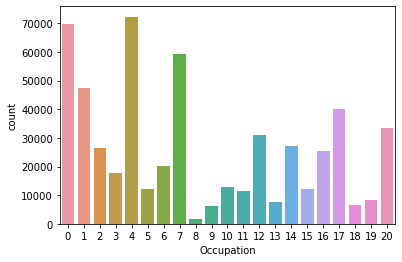

In [207]:
sns.countplot(data=df, x='Occupation')

<AxesSubplot:xlabel='City_Category', ylabel='count'>

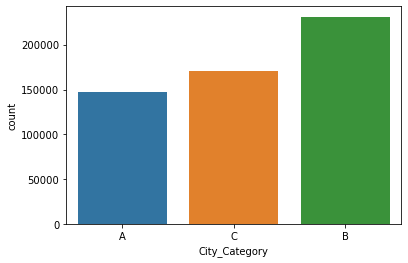

In [208]:
sns.countplot(data=df, x='City_Category')

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

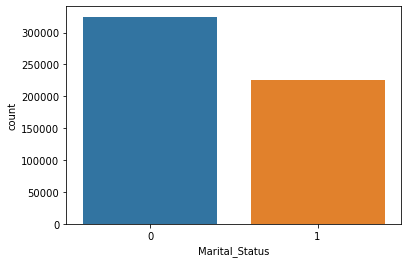

In [209]:
sns.countplot(data=df, x='Marital_Status')

<AxesSubplot:xlabel='Product_Category', ylabel='count'>

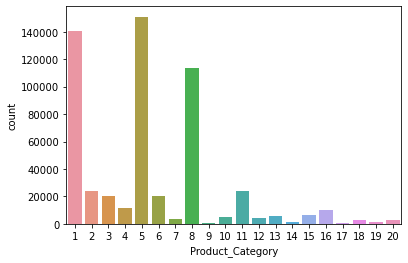

In [210]:
sns.countplot(data=df, x='Product_Category')

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

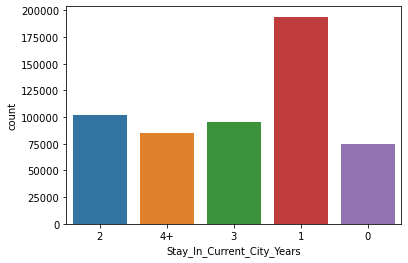

In [211]:
sns.countplot(data=df, x='Stay_In_Current_City_Years')

From the above plots, we cna infer the following:

- More purchases are made by Males compared to females
- Most purchases are made by customers in the age bracket 18 - 45 years of which 26-35 year old top the list
- Occupation Category 0, 4 and 7 tend to make the most purchases from the sample shared. Since we don't have a visibility on the type of products and the correlation between occupation and the type of products purchased, further investigation can help identify if there is a trend followed.
- Most of the purchases are made from City B
- Most of the purchases are made by single / unmarried customers
- Product from Category 1,5,8 and 11 are the most ordered.
- Most of the orders are made by customers who have been staying in the current city for a year or less. THis can help cater to the customers who move frequently.

## Bivariate Analysis of the Categorical Variables against the Purchase Value

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

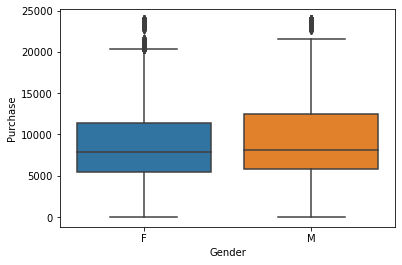

In [212]:
sns.boxplot(x = "Gender",y = "Purchase",data = data)

#### From the above plot 
* We can see that there are outliers in the purchase value of Males and females and also the median purchase value of males and females are almost same.
* We can also see that the maximum purchase value of males is more than that of females.

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

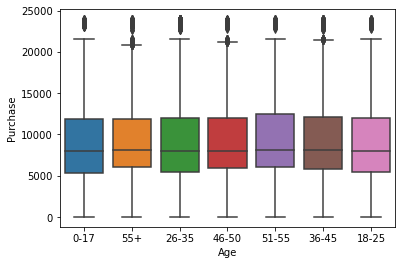

In [213]:
sns.boxplot(data = df, x="Age",y="Purchase")

From the above plot of age vs purchase value we can see that the median purchase value across different age groups are almost same between 5-10k

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

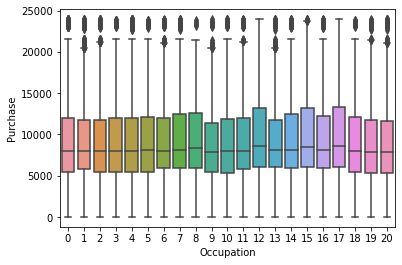

In [214]:
sns.boxplot(data = df, x="Occupation",y="Purchase")

From the above plot of occupation vs purchase value we can see that the median purchase value across different occupations do not vary much.

<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

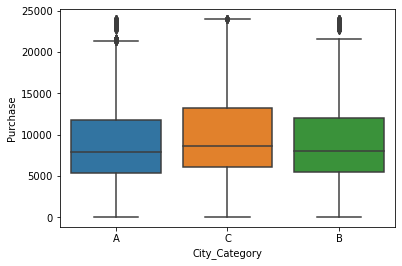

In [215]:
sns.boxplot(data = df, x="City_Category",y="Purchase")

From the above plot of city category vs purchase value we can see that the median purchase value across different cities do not vary much. However, the purchase value from City C tend to be more than that from the other two.

<AxesSubplot:xlabel='Marital_Status', ylabel='Purchase'>

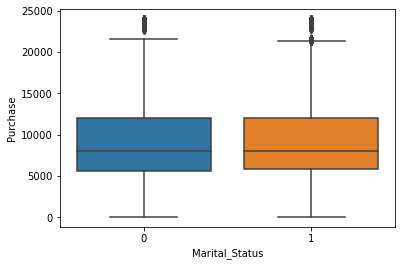

In [216]:
sns.boxplot(data = df, x="Marital_Status",y="Purchase")

<AxesSubplot:xlabel='Product_Category', ylabel='Purchase'>

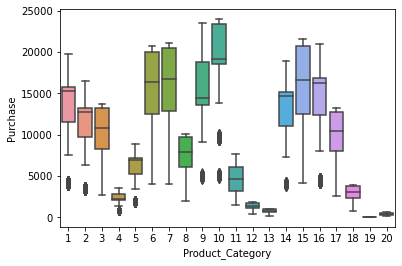

In [217]:
sns.boxplot(data = df, x="Product_Category",y="Purchase")

From the above plot we can see that the median purchase value of product categories 6,7,9,10,14,15 and 16 are more while the product categories 19 and 20 have the lowest.

## Multivariate Analysis

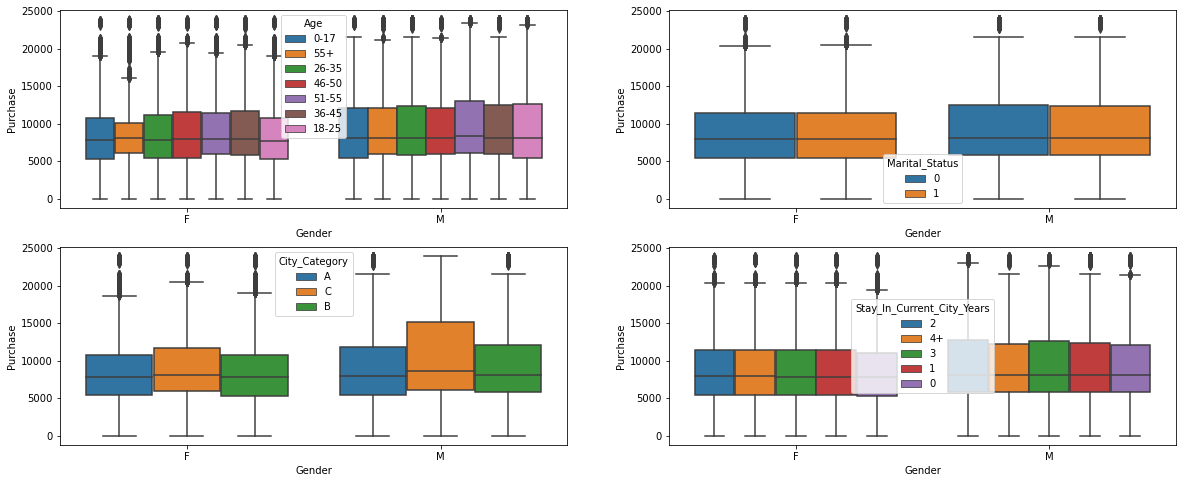

In [218]:
figure, axes = plt.subplots(nrows = 2, ncols = 2,figsize = (20,8))

sns.boxplot(data = df, x="Gender", y="Purchase", hue="Age",ax=axes[0,0])
sns.boxplot(data = df, x="Gender", y="Purchase", hue="Marital_Status",ax=axes[0,1])
sns.boxplot(data = df, x="Gender", y="Purchase", hue="City_Category",ax=axes[1,0])
sns.boxplot(data = df, x="Gender", y="Purchase", hue="Stay_In_Current_City_Years",ax=axes[1,1])
plt.show()

In [219]:
#Since one user can place may orders, checking number of unique values

unique_users = df["User_ID"].nunique()

We can see that there are only 5891 unique customers / users in the sample dataset shared. Thus we need to group the purchase value of each customer/user accordingly.

In [220]:
grp_user_purchases = df.groupby(["User_ID","Gender"])["Purchase"].sum()
grp_user_purchases = grp_user_purchases.reset_index()

grp_user_purchases.head()

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001


In [221]:
grp_user_purchases["Gender"].value_counts()

M    4225
F    1666
Name: Gender, dtype: int64

We can see that there are 4225 unique Male Users and 1666 Unique Female Users in the sample shared

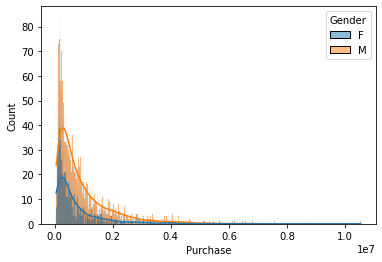

In [222]:
sns.histplot(data = grp_user_purchases, x = "Purchase" ,hue="Gender", kde=True, bins = 1000)
plt.show()

It can be seen that on an average male customer tend to spend more than a female customer

In [223]:
#Further from the grouping, checking whats the sample average of male and female customers

male_avg = round(grp_user_purchases[grp_user_purchases["Gender"]=="M"]["Purchase"].mean(),2)
female_avg = round(grp_user_purchases[grp_user_purchases["Gender"]=="F"]["Purchase"].mean(),2)

print(f"The sample average of male and female are {male_avg} and {female_avg} respectively")

The sample average of male and female are 925344.4 and 712024.39 respectively


In [224]:
male_users_df = grp_user_purchases[grp_user_purchases["Gender"]=="M"]
female_users_df = grp_user_purchases[grp_user_purchases["Gender"]=="F"]

In [225]:
male_users_df.head()

,User_ID,Gender,Purchase
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
6,1000007,M,234668


In [226]:
female_users_df.head()

,User_ID,Gender,Purchase
0,1000001,F,334093
5,1000006,F,379930
9,1000010,F,2169510
10,1000011,F,557023
15,1000016,F,150490


#### Now that we have the sample averages, we use the Central Limit Theorem and Confidence Interval to approximate the population mean.

<b> Central Limit Theorem: </b>
>>> It states that the sampling distribution of sample means follow Normal / Gaussian Distribution with a Mean approximately same as the population mean and the standard deviation with population sd/root(n) also known as the standard error

In [227]:
male_users = len(male_users_df)
female_users = len(female_users_df)

print("Male Users:",male_users,"\n","Female Users: ",female_users)

Male Users: 4225 
 Female Users:  1666


In [228]:
iterations = 1000
male_sample = 3000
female_sample = 1500

male_sample_means = []
female_sample_means = []

for i in range(iterations):
    male_sample_mean = male_users_df["Purchase"].sample(male_sample,replace=True).mean()
    female_sample_mean = female_users_df["Purchase"].sample(female_sample,replace=True).mean()

    male_sample_means.append(male_sample_mean)
    female_sample_means.append(female_sample_mean)

<AxesSubplot:ylabel='Count'>

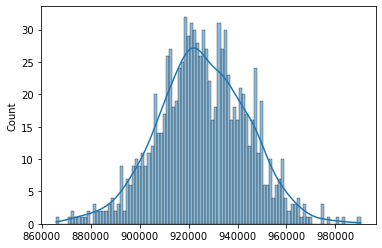

In [229]:
sns.histplot(male_sample_means, bins=100,kde=True)


<AxesSubplot:ylabel='Count'>

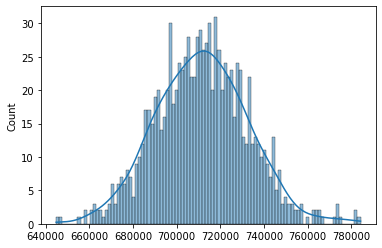

In [230]:
sns.histplot(female_sample_means, bins=100,kde=True)

In [231]:
sample_standard_deviation_male = np.std(male_users_df["Purchase"])
sample_standard_deviation_female = female_users_df["Purchase"].std()

pop_mean_male_clt = np.mean(male_sample_means)
pop_mean_female_clt = np.mean(female_sample_means)

### Evaluating 95% Confidence Interval for Male and Female Customers

In [232]:
#Computing the 95% confidence interval using CLT

z_lower = norm.ppf(0.025)
z_upper = norm.ppf(0.975)

ci_lower_male_clt = pop_mean_male_clt + (z_lower*sample_standard_deviation_male/np.sqrt(male_sample))
ci_upper_male_clt = pop_mean_male_clt + (z_upper*sample_standard_deviation_male/np.sqrt(male_sample))

print(f"The Confidence Interval of male spending based on CLT is ({ci_lower_male_clt},{ci_upper_male_clt})")

ci_lower_female_clt = pop_mean_female_clt + (z_lower*sample_standard_deviation_female/np.sqrt(female_sample))
ci_upper_female_clt = pop_mean_female_clt + (z_upper*sample_standard_deviation_female/np.sqrt(female_sample))

print(f"The Confidence Interval of female spending based on CLT is ({ci_lower_female_clt},{ci_upper_female_clt})")

#Computing the 95% confidence interval by getting the 2.5th percentile and 97.5 percentile values of the bootstrapped means

ci_lower_male = np.percentile(male_sample_means,2.5)
ci_upper_male = np.percentile(male_sample_means,97.5)

print(f"The Confidence Interval of male spending based on Bootstrapping is ({ci_lower_male},{ci_upper_male})")


#Computing the 95% confidence interval by getting the 2.5th percentile and 97.5 percentile values of the bootstrapped means

ci_lower_female = np.percentile(female_sample_means,2.5)
ci_upper_female = np.percentile(female_sample_means,97.5)

print(f"The Confidence Interval of female spending based on Bootstrapping is ({ci_lower_female},{ci_upper_female})")


The Confidence Interval of male spending based on CLT is (890411.172575506,960956.4802578272)
The Confidence Interval of female spending based on CLT is (670659.8451116384,752375.5357803615)
The Confidence Interval of male spending based on Bootstrapping is (888768.7336333334,960368.48595)
The Confidence Interval of female spending based on Bootstrapping is (671019.8585333333,752218.2645333334)


### Evaluating 90% Confidence Interval for Male and Female Customers

In [233]:
#Computing the 90% confidence interval using CLT

z_lower_5 = norm.ppf(0.05)
z_upper_95 = norm.ppf(0.95)

ci_lower_male_clt_90 = pop_mean_male_clt + (z_lower_5*sample_standard_deviation_male/np.sqrt(male_sample))
ci_upper_male_clt_90 = pop_mean_male_clt + (z_upper_95*sample_standard_deviation_male/np.sqrt(male_sample))

print(f"The 90% Confidence Interval of male spending based on CLT is ({ci_lower_male_clt_90},{ci_upper_male_clt_90})")

ci_lower_female_clt_90 = pop_mean_female_clt + (z_lower_5*sample_standard_deviation_female/np.sqrt(female_sample))
ci_upper_female_clt_90= pop_mean_female_clt + (z_upper_95*sample_standard_deviation_female/np.sqrt(female_sample))

print(f"The 90% Confidence Interval of female spending based on CLT is ({ci_lower_female_clt_90},{ci_upper_female_clt_90})")

#Computing the 90% confidence interval by getting the 2.5th percentile and 97.5 percentile values of the bootstrapped means

ci_lower_male_5 = np.percentile(male_sample_means,5)
ci_upper_male_95 = np.percentile(male_sample_means,95)

print(f"The 90% Confidence Interval of male spending based on Bootstrapping is ({ci_lower_male_5},{ci_upper_male_95})")

#Computing the 90% confidence interval by getting the 2.5th percentile and 97.5 percentile values of the bootstrapped means

ci_lower_female_5 = np.percentile(female_sample_means,5)
ci_upper_female_95 = np.percentile(female_sample_means,95)

print(f"The 90% Confidence Interval of female spending based on Bootstrapping is ({ci_lower_female_5},{ci_upper_female_95})")



The 90% Confidence Interval of male spending based on CLT is (896082.0821700997,955285.5706632335)
The 90% Confidence Interval of female spending based on CLT is (677228.705741305,745806.6751506949)
The 90% Confidence Interval of male spending based on Bootstrapping is (895618.4283,955826.1341666667)
The 90% Confidence Interval of female spending based on Bootstrapping is (677185.2635666667,745132.1113666666)


### Evaluating 99% Confidence Interval for Male and Female Customers

In [234]:
#Computing the 99% confidence interval using CLT

z_lower_99 = norm.ppf(0.005)
z_upper_99 = norm.ppf(0.995)

ci_lower_male_clt_99 = pop_mean_male_clt + (z_lower_99*sample_standard_deviation_male/np.sqrt(male_sample))
ci_upper_male_clt_99 = pop_mean_male_clt + (z_upper_99*sample_standard_deviation_male/np.sqrt(male_sample))

print(f"The 99% Confidence Interval of male spending based on CLT is ({ci_lower_male_clt_99},{ci_upper_male_clt_99})")

ci_lower_female_clt_99 = pop_mean_female_clt + (z_lower_99*sample_standard_deviation_female/np.sqrt(female_sample))
ci_upper_female_clt_99= pop_mean_female_clt + (z_upper_99*sample_standard_deviation_female/np.sqrt(female_sample))

print(f"The 99% Confidence Interval of female spending based on CLT is ({ci_lower_female_clt_99},{ci_upper_female_clt_99})")

#Computing the 90% confidence interval by getting the 2.5th percentile and 97.5 percentile values of the bootstrapped means

ci_lower_male_99 = np.percentile(male_sample_means,0.5)
ci_upper_male_99 = np.percentile(male_sample_means,99.5)

print(f"The 99% Confidence Interval of male spending based on Bootstrapping is ({ci_lower_male_99},{ci_upper_male_99})")

#Computing the 90% confidence interval by getting the 2.5th percentile and 97.5 percentile values of the bootstrapped means

ci_lower_female_99 = np.percentile(female_sample_means,0.5)
ci_upper_female_99 = np.percentile(female_sample_means,99.5)

print(f"The 99% Confidence Interval of female spending based on Bootstrapping is ({ci_lower_female_99},{ci_upper_female_99})")

The 99% Confidence Interval of male spending based on CLT is (879327.7014599524,972039.9513733808)
The 99% Confidence Interval of female spending based on CLT is (657821.3796350568,765214.0012569431)
The 99% Confidence Interval of male spending based on Bootstrapping is (875675.3366583333,974368.1893616667)
The 99% Confidence Interval of female spending based on Bootstrapping is (660721.9367833334,773806.8655733333)


### Evaluating the same for Marital Status

In [239]:
df_marital_status = df.groupby(["User_ID","Marital_Status"])["Purchase"].sum()
df_marital_status = df_marital_status.reset_index()

df_married = df_marital_status[df_marital_status["Marital_Status"]==1]
df_unmarried = df_marital_status[df_marital_status["Marital_Status"]==0]

In [241]:
#Computing the Sample Means for Married and Unmarried Customers

married_sample_mean = df_married["Purchase"].mean()
unmarried_sample_mean = df_unmarried["Purchase"].mean()

print(f"The sample average of married and unmarried are {married_sample_mean} and {unmarried_sample_mean} respectively")

The sample average of married and unmarried are 843526.7966855295 and 880575.7819724905 respectively


In [244]:
married_users = len(df_married)
unmarried_users = len(df_unmarried)

print("Married Users:",married_users,"\n","Unmarried Users: ",unmarried_users)

Married Users: 2474 
 Unmarried Users:  3417


In [245]:
iterations = 1000
married_sample = 2000
unmarried_sample = 2500

married_sample_means = []
unmarried_sample_means = []

for i in range(iterations):
    married_sample_mean = df_married["Purchase"].sample(married_sample,replace=True).mean()
    unmarried_sample_mean = df_unmarried["Purchase"].sample(unmarried_sample,replace=True).mean()

    married_sample_means.append(married_sample_mean)
    unmarried_sample_means.append(unmarried_sample_mean)

<AxesSubplot:ylabel='Count'>

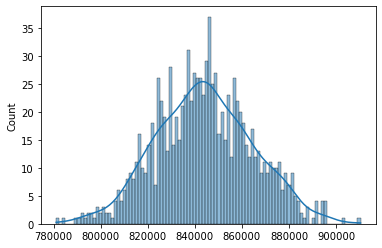

In [247]:
sns.histplot(married_sample_means, bins=100,kde=True)

<AxesSubplot:ylabel='Count'>

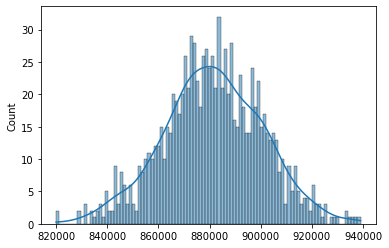

In [246]:
sns.histplot(unmarried_sample_means, bins=100,kde=True)

In [250]:
sample_standard_deviation_married = np.std(df_married["Purchase"])
sample_standard_deviation_unmarried = df_unmarried["Purchase"].std()

pop_mean_married_clt = np.mean(married_sample_means)
pop_mean_unmarried_clt = np.mean(unmarried_sample_means)

### Evaluating 95% Confidence INterval for Married and Unmarried Customers

In [254]:
#Computing the 95% confidence interval using CLT

z_lower = norm.ppf(0.025)
z_upper = norm.ppf(0.975)

ci_lower_married_clt = pop_mean_married_clt + (z_lower*sample_standard_deviation_married/np.sqrt(married_sample))
ci_upper_married_clt = pop_mean_married_clt + (z_upper*sample_standard_deviation_married/np.sqrt(married_sample))

print(f"The Confidence Interval of married customers spending based on CLT is ({ci_lower_married_clt},{ci_upper_married_clt})")

ci_lower_unmarried_clt = pop_mean_unmarried_clt + (z_lower*sample_standard_deviation_unmarried/np.sqrt(unmarried_sample))
ci_upper_unmarried_clt = pop_mean_unmarried_clt + (z_upper*sample_standard_deviation_unmarried/np.sqrt(unmarried_sample))

print(f"The Confidence Interval of unmarried customers spending based on CLT is ({ci_lower_unmarried_clt},{ci_upper_unmarried_clt})")

#Computing the 95% confidence interval by getting the 2.5th percentile and 97.5 percentile values of the bootstrapped means

ci_lower_married = np.percentile(married_sample_means,2.5)
ci_upper_married = np.percentile(married_sample_means,97.5)

print(f"The Confidence Interval of married cusotomers spending based on Bootstrapping is ({ci_lower_married},{ci_upper_married})")


#Computing the 95% confidence interval by getting the 2.5th percentile and 97.5 percentile values of the bootstrapped means

ci_lower_unmarried = np.percentile(unmarried_sample_means,2.5)
ci_upper_unmarried = np.percentile(unmarried_sample_means,97.5)

print(f"The Confidence Interval of unmarried customers spending based on Bootstrapping is ({ci_lower_unmarried},{ci_upper_unmarried})")

The Confidence Interval of married customers spending based on CLT is (803115.9195078645,885085.0696561355)
The Confidence Interval of unmarried customers spending based on CLT is (844127.3963758989,918561.8305657009)
The Confidence Interval of married cusotomers spending based on Bootstrapping is (806146.6369125,883174.663175)
The Confidence Interval of unmarried customers spending based on Bootstrapping is (842860.31496,919523.40192)


### Evaluating 90% Confidence INterval for Married and Unmarried Customers

In [253]:
#Computing the 90% confidence interval using CLT

z_lower_5 = norm.ppf(0.05)
z_upper_95 = norm.ppf(0.95)

ci_lower_married_clt_90 = pop_mean_married_clt + (z_lower_5*sample_standard_deviation_married/np.sqrt(married_sample))
ci_upper_married_clt_90 = pop_mean_married_clt + (z_upper_95*sample_standard_deviation_married/np.sqrt(married_sample))

print(f"The 90% Confidence Interval of married spending based on CLT is ({ci_lower_married_clt_90},{ci_upper_married_clt_90})")

ci_lower_unmarried_clt_90 = pop_mean_unmarried_clt + (z_lower_5*sample_standard_deviation_unmarried/np.sqrt(unmarried_sample))
ci_upper_unmarried_clt_90= pop_mean_unmarried_clt + (z_upper_95*sample_standard_deviation_unmarried/np.sqrt(unmarried_sample))

print(f"The 90% Confidence Interval of unmarried spending based on CLT is ({ci_lower_unmarried_clt_90},{ci_upper_unmarried_clt_90})")

#Computing the 90% confidence interval by getting the 5th percentile and 95th percentile values of the bootstrapped means

ci_lower_married_5 = np.percentile(married_sample_means,5)
ci_upper_married_95 = np.percentile(married_sample_means,95)

print(f"The 90% Confidence Interval of married spending based on Bootstrapping is ({ci_lower_married_5},{ci_upper_married_95})")

#Computing the 90% confidence interval by getting the 5th percentile and 95th percentile values of the bootstrapped means

ci_lower_unmarried_5 = np.percentile(unmarried_sample_means,5)
ci_upper_unmarried_95 = np.percentile(unmarried_sample_means,95)

print(f"The 90% Confidence Interval of unmarried spending based on Bootstrapping is ({ci_lower_unmarried_5},{ci_upper_unmarried_95})")

The 90% Confidence Interval of married spending based on CLT is (809705.1549270336,878495.8342369666)
The 90% Confidence Interval of unmarried spending based on CLT is (850110.9402979971,912578.2866436027)
The 90% Confidence Interval of married spending based on Bootstrapping is (811768.95095,878752.0046)
The 90% Confidence Interval of unmarried spending based on Bootstrapping is (847338.4311200001,913179.06432)


###  Evaluating 99% Confidence Interval for Married and Unmarried Customers

In [255]:
#Computing the 99% confidence interval using CLT

z_lower_99 = norm.ppf(0.005)
z_upper_99 = norm.ppf(0.995)

ci_lower_married_clt_99 = pop_mean_married_clt + (z_lower_99*sample_standard_deviation_married/np.sqrt(married_sample))
ci_upper_married_clt_99 = pop_mean_married_clt + (z_upper_99*sample_standard_deviation_married/np.sqrt(married_sample))

print(f"The 99% Confidence Interval of male spending based on CLT is ({ci_lower_married_clt_99},{ci_upper_married_clt_99})")

ci_lower_unmarried_clt_99 = pop_mean_unmarried_clt + (z_lower_99*sample_standard_deviation_unmarried/np.sqrt(unmarried_sample))
ci_upper_unmarried_clt_99= pop_mean_unmarried_clt + (z_upper_99*sample_standard_deviation_unmarried/np.sqrt(unmarried_sample))

print(f"The 99% Confidence Interval of female spending based on CLT is ({ci_lower_unmarried_clt_99},{ci_upper_unmarried_clt_99})")

#Computing the 90% confidence interval by getting the 2.5th percentile and 97.5 percentile values of the bootstrapped means

ci_lower_married_99 = np.percentile(married_sample_means,0.5)
ci_upper_married_99 = np.percentile(married_sample_means,99.5)

print(f"The 99% Confidence Interval of male spending based on Bootstrapping is ({ci_lower_married_99},{ci_upper_married_99})")

#Computing the 90% confidence interval by getting the 2.5th percentile and 97.5 percentile values of the bootstrapped means

ci_lower_unmarried_99 = np.percentile(unmarried_sample_means,0.5)
ci_upper_unmarried_99 = np.percentile(unmarried_sample_means,99.5)

print(f"The 99% Confidence Interval of female spending based on Bootstrapping is ({ci_lower_unmarried_99},{ci_upper_unmarried_99})")

The 99% Confidence Interval of male spending based on CLT is (790237.6326609775,897963.3565030226)
The 99% Confidence Interval of female spending based on CLT is (832432.8992016809,930256.3277399188)
The 99% Confidence Interval of male spending based on Bootstrapping is (792257.5813775001,895549.09817)
The 99% Confidence Interval of female spending based on Bootstrapping is (831143.2486180001,933096.4203499999)


#### We can see that the 95%,90% and 99% Confidence INtervals of Means based on Marital Status is not statistically significant as the confidence intervals for Married and Unmarried Customers Overlap

## Insights and Recommendations

- More purchases are made by Males compared to females
- Most purchases are made by customers in the age bracket 18 - 45 years of which 26-35 year old top the list
- Occupation Category 0, 4 and 7 tend to make the most purchases from the sample shared. Since we don't have a visibility on the type of products and the correlation between occupation and the type of products purchased, further investigation can help identify if there is a trend followed.
- Most of the purchases are made from City B
- Most of the purchases are made by single / unmarried customers
- Product from Category 1,5,8 and 11 are the most ordered.
- Most of the orders are made by customers who have been staying in the current city for a year or less. This can help cater to the customers who move frequently.
- From the analsysis 90%, 95% and 99% CI based on Gender, we can say that the average spending of males are more than females and the Confidence Intervals for male and female do not overlap hence the difference is statistically significant. Thus we can conclude that the spending behavious of Male is more than that of females.